# Preparation

In [2]:
!pip install tensorflow_datasets

     |████████████████████████████████| 4.0 MB 25.9 MB/s 
     |████████████████████████████████| 48 kB 10.1 MB/s 
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21493 sha256=1a3bdd13f01990e4861f95597cb8c4a1b1d132458999ccf41c8a856ba3229079
  Stored in directory: /root/.cache/pip/wheels/29/93/c6/762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
Successfully built promise
ERROR: tensorflow-metadata 1.5.0 has requirement absl-py<0.13,>=0.9, but you'll have absl-py 0.15.0 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In this quest, you will work with the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). It contains 60000 32x32 colour images in 10 classes, with 6000 images per class. Your task will be predicting image classes.


# Tasks

Normalize pixel values of both train and test images to the values in the range between 0 and 1

In [6]:
# your code
train_images_normed = train_images/255.0
test_images_normed = test_images/255.0

test_images_normed.shape, test_labels.shape

((10000, 32, 32, 3), (10000, 1))

In [20]:
labels = list(set((train_labels).flatten()))
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


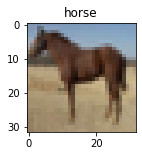

In [108]:
import random
n_im = random.randint(0,train_labels.shape[0])
plt.figure(figsize=(2,2))
plt.imshow(train_images[n_im], vmin = 0, vmax = 255, )
#plt.colorbar()
plt.grid(False)
plt.title(class_names[int(train_labels[n_im])])
plt.show()

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

Build a sequential model with the following architecture:

conv2d - (None, 30, 30, 32)  
_________________________________________________________________
max_pooling2d - (None, 15, 15, 32)        
_________________________________________________________________
conv2d - (None, 13, 13, 64)
_________________________________________________________________
max_pooling2d - (None, 6, 6, 64)        
_________________________________________________________________
conv2d - (None, 4, 4, 128) 
_________________________________________________________________
flatten - (None, 2048)       
_________________________________________________________________
dense - (None, 64)    
_________________________________________________________________
dense - (None, 10)       


In [110]:
# your code
#create model
model_cnn = Sequential()
#add model layers
nb_filters_first_cnn = 32
nb_filters_second_cnn = 64
nb_filters_third_cnn = 128
nb_out_layer_neurons = len(labels) # defined by number of classes in classification task 
filter_size = 3

#32 filters ,each filter has size 3, if kernel size specified that way, 3 is interpreted as 3*3
model_cnn.add(Conv2D(nb_filters_first_cnn, kernel_size=filter_size, activation="relu", input_shape=(32,32,3)))
# kernel size: specifying the height and width of the 2D convolution filter. 
# Can be a single integer to specify the same value for all spatial dimensions

model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(nb_filters_second_cnn, kernel_size=filter_size, activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(nb_filters_third_cnn, kernel_size=filter_size, activation="relu"))

# 3d datastructure from output of prev conv layer, will flatten into 1dim vector
model_cnn.add(Flatten())

model_cnn.add(Dense(64, activation="relu"))
model_cnn.add(Dense(nb_out_layer_neurons, activation="softmax"))
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

Compile the model using Adam optimizer, sparse categorical crossentropy as loss function, and choose an appropriate metric for classification. Use 10 epochs to train the model.

In [111]:
train_images_normed.shape, test_images_normed.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [112]:
train_labels.shape, test_labels.shape

((50000, 1), (10000, 1))

In [113]:
# one-hot encode the training and testing labels
# in case of one-hot-encoded labels do not use sparse_categorical_entropy as loss but use categorical_entropy!

from tensorflow.keras.utils import to_categorical

#train_labels = to_categorical(train_labels, 10)
#test_labels = to_categorical(test_labels, 10)

In [114]:
train_labels.shape, test_labels.shape

((50000, 1), (10000, 1))

In [ ]:
# your code
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

model_cnn.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(0.002),
                  metrics=['accuracy'])

story = model_cnn.fit(train_images_normed, train_labels, epochs=15, batch_size=100, validation_split=0.2  )                  

Epoch 1/15
400/400 [==============================] - 124s 308ms/step - loss: 1.9363 - accuracy: 0.2620 - val_loss: 1.4344 - val_accuracy: 0.4858
Epoch 2/15
400/400 [==============================] - 117s 291ms/step - loss: 1.2991 - accuracy: 0.5294 - val_loss: 1.1693 - val_accuracy: 0.5917
Epoch 3/15
400/400 [==============================] - 122s 305ms/step - loss: 1.0955 - accuracy: 0.6085 - val_loss: 1.0505 - val_accuracy: 0.6306
Epoch 4/15
400/400 [==============================] - 113s 282ms/step - loss: 0.9721 - accuracy: 0.6554 - val_loss: 0.9837 - val_accuracy: 0.6570
Epoch 5/15
400/400 [==============================] - 108s 269ms/step - loss: 0.8867 - accuracy: 0.6885 - val_loss: 0.9265 - val_accuracy: 0.6748
Epoch 6/15
400/400 [==============================] - 85s 213ms/step - loss: 0.8020 - accuracy: 0.7215 - val_loss: 0.9001 - val_accuracy: 0.6942
Epoch 7/15
400/400 [==============================] - 85s 212ms/step - loss: 0.7312 - accuracy: 0.7423 - val_loss: 0.8609 - v

Evaluate the model on test data to get the loss and accuracy metrics

In [ ]:
# your code
print(f'Loss and accuracy:\n {model_cnn.evaluate(test_images_normed, test_labels)}')


313/313 [==============================] - 7s 23ms/step - loss: 1.0533 - accuracy: 0.6951
Loss and accuracy:
 [1.0532894134521484, 0.6951000094413757]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a109ea11-a7da-42aa-8af0-3a0cdafc917e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>